In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bward\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# put known details of the song or poem here. You must have the lines in a text file in the MetreMuse directory. 
filename = "lyrics/deep_in_the_woods"
title = "'Deep In The Woods"

In [3]:
# This function outputs the Net Sentiment Rate (NSR) of the whole poem or song. 
def generic_text2emotion(filename, title) :
    
    if filename.find(".txt") == -1:
        filename = filename + ".txt"
    
    file1 = open(filename, 'r')
    
    lines = 0
    
    for line in file1:
        b = line.strip()
        if b != "" :
            lines += 1
    
    file1.close()
    
    file1 = open(filename, 'r')
    
    emotion = np.zeros((5, lines + 1), dtype=float) # create emotion array
    vec = [0,0,0,0,0]
    lines = 0     # reset number of lines to later assign values to emotion array efficiently
    
    # Adding each line's ratings
    for line in file1:
        b = line.strip()
        score = te.get_emotion(b)
    
        if b != "" :
            lines += 1
            vec = [score['Happy'], score['Angry'], score['Surprise'], score['Sad'], score['Fear']]
        
            for i in range(5) :
                emotion[i, lines] = vec[i]
    
    # Closing file(s)
    file1.close() 
    
    # create graph here
    plt.plot(emotion[0], label = 'Happy')
    plt.plot(emotion[1], label = 'Angry')
    plt.plot(emotion[2], label = 'Surprise')
    plt.plot(emotion[3], label = 'Sad')
    plt.plot(emotion[4], label = 'Fear')
    plt.title("Emotion by Line of '" + title + "' (Text2Emotion)")
    plt.xlabel('Line')
    plt.ylabel('Emotion Rating')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return 0

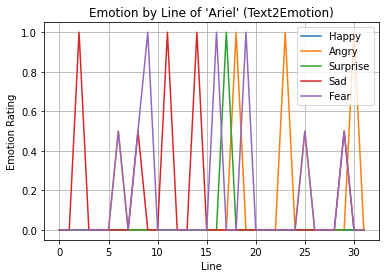

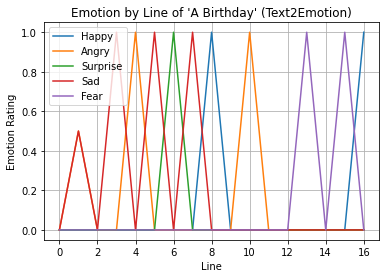

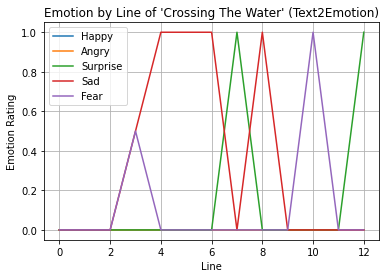

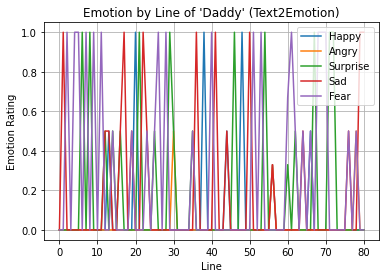

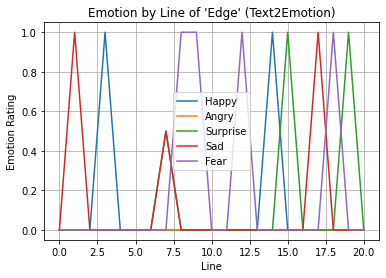

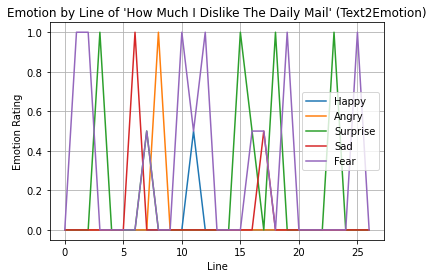

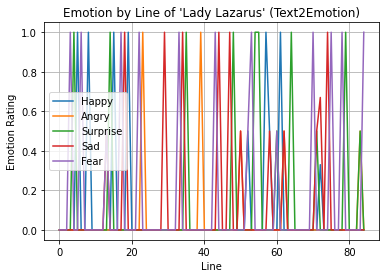

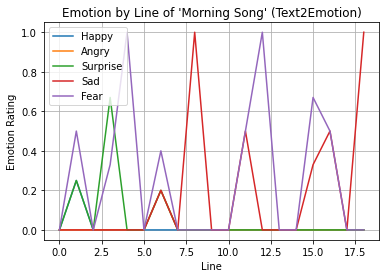

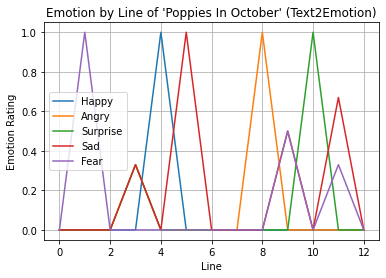

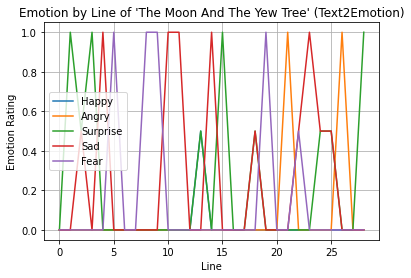

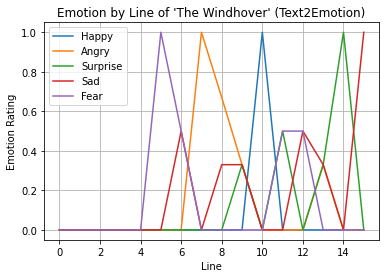

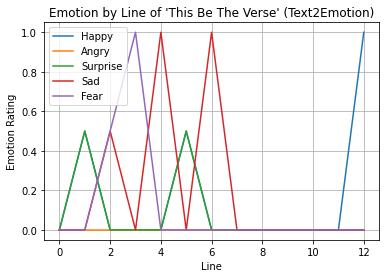

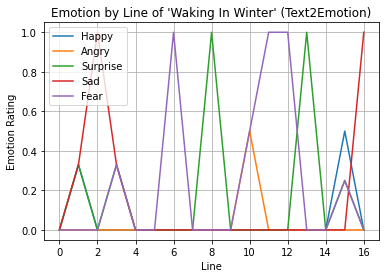

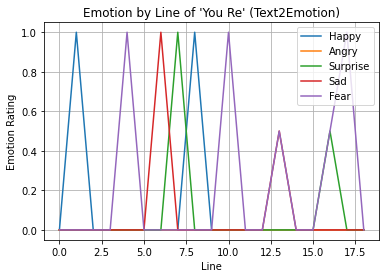

In [4]:
poetry = os.listdir('poetry/')
x = 0

for l in poetry :
    filename = "poetry/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = generic_text2emotion(filename, title)

Emotion by Line of Abcdefu:


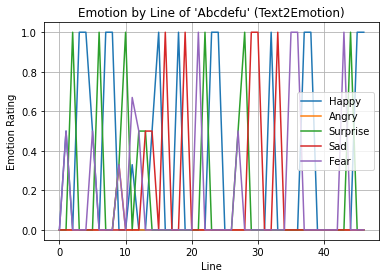

Emotion by Line of All I Want For Christmas Is You:


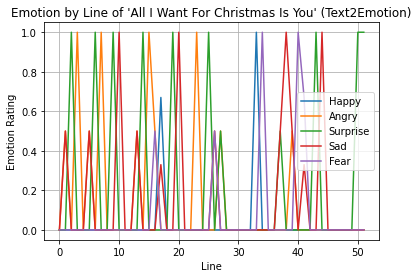

Emotion by Line of Bohemian Rhapsody:


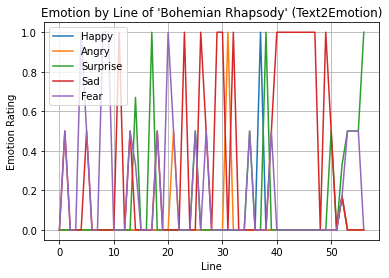

Emotion by Line of Break My Stride:


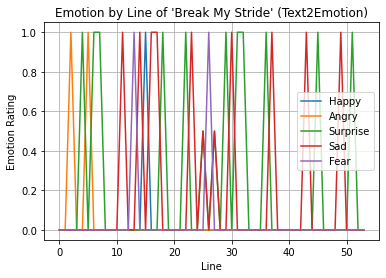

Emotion by Line of Country Road:


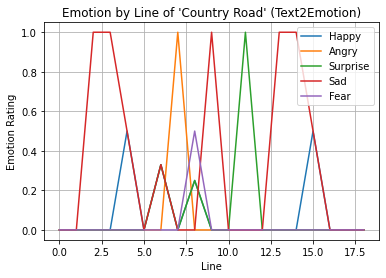

Emotion by Line of Country Roads:


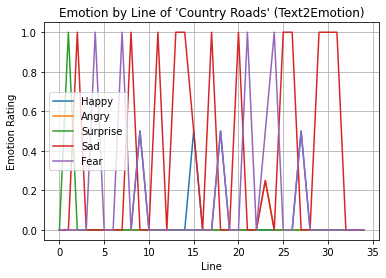

Emotion by Line of Deep In The Woods-The Birthday Party:


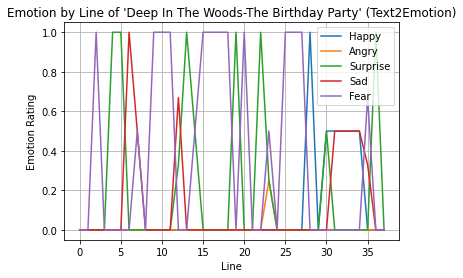

Emotion by Line of Deep In The Woods:


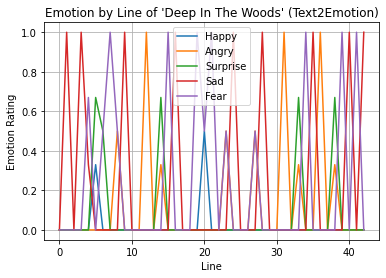

Emotion by Line of Dont Let Me Get Me :


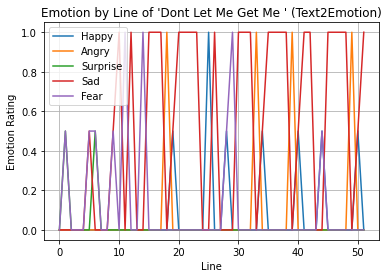

Emotion by Line of Easy On Me:


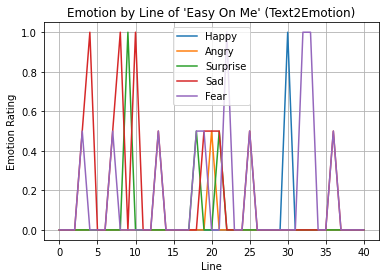

Emotion by Line of Fairytale Of New York:


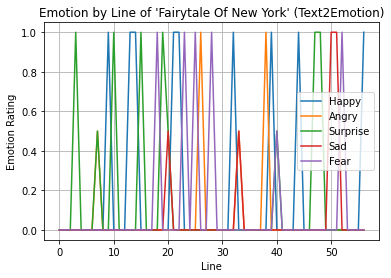

Emotion by Line of Happy Talk :


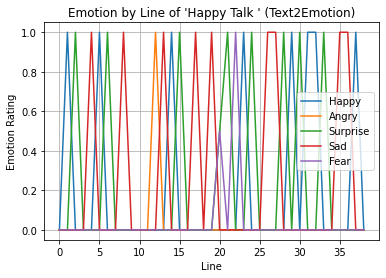

Emotion by Line of Im Gonna Wash That Man :


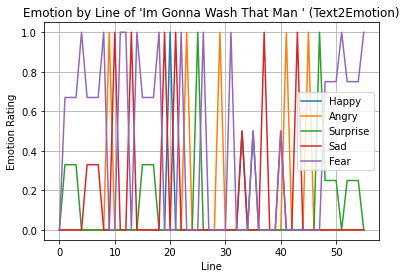

Emotion by Line of Im Still Standing:


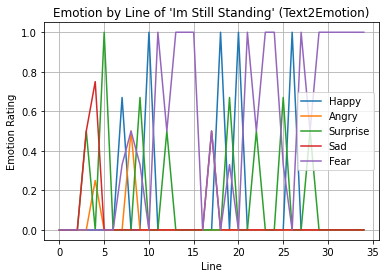

Emotion by Line of Its Beginning To Look A Lot Like Christmas:


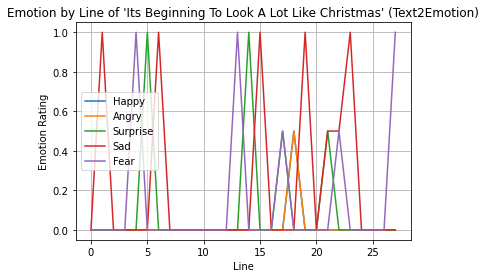

Emotion by Line of I Am Im Me:


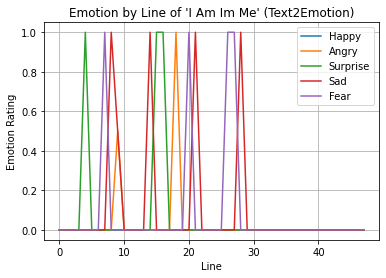

Emotion by Line of I Feel Pretty:


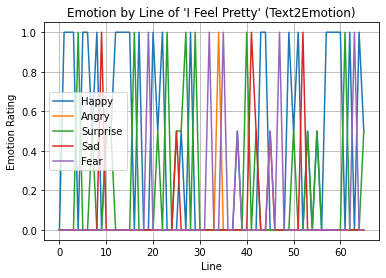

Emotion by Line of I Gotta Be Me:


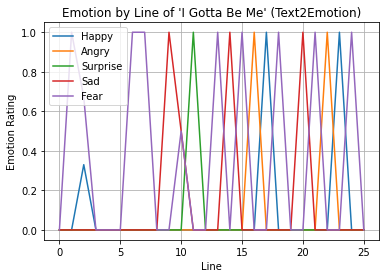

Emotion by Line of I Will Survive:


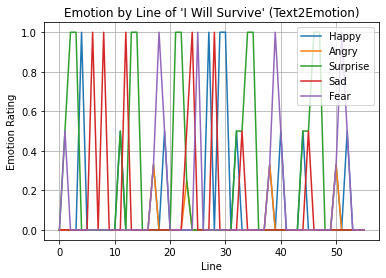

Emotion by Line of I Wont Back Down:


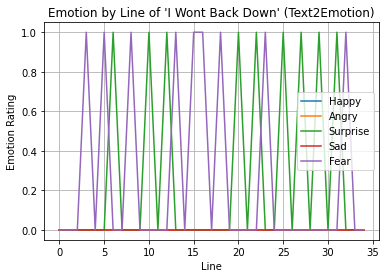

Emotion by Line of Last Christmas:


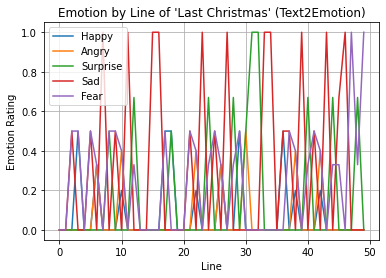

Emotion by Line of Merry Christmas:


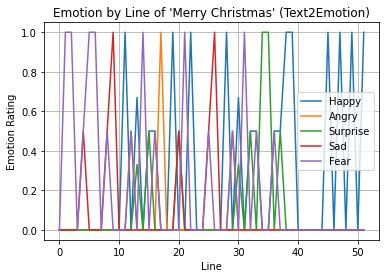

Emotion by Line of Merry Christmas Everyone:


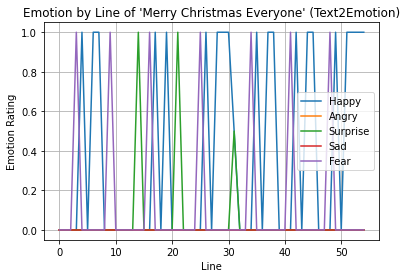

Emotion by Line of My Immortal:


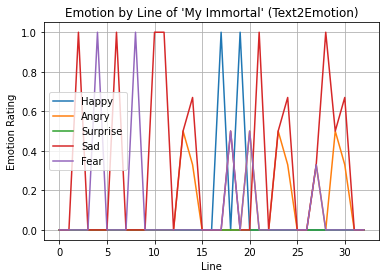

Emotion by Line of My Life:


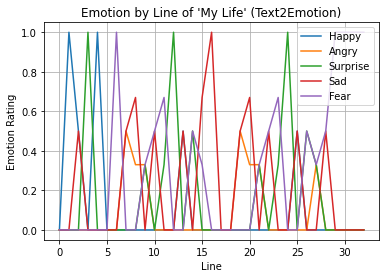

Emotion by Line of Ob-La-Di Ob-La-Da:


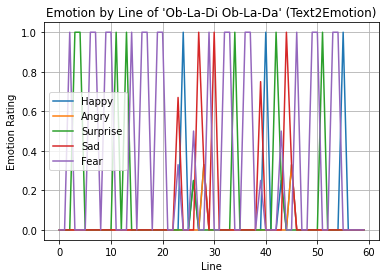

Emotion by Line of Red Red Wine:


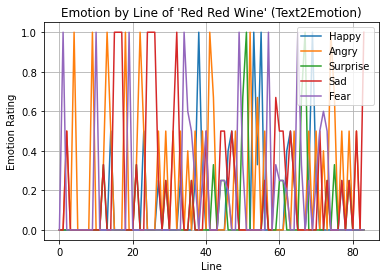

Emotion by Line of Roar:


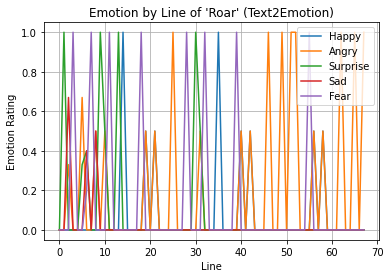

Emotion by Line of Rockin Around The Christmas Tree:


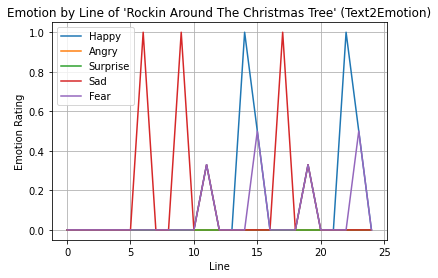

Emotion by Line of Seventeen Going Under:


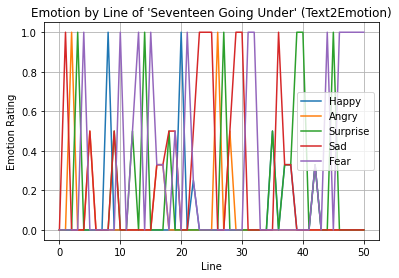

Emotion by Line of So What:


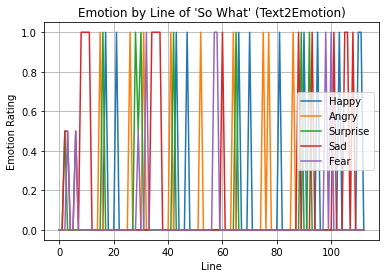

Emotion by Line of Survivor:


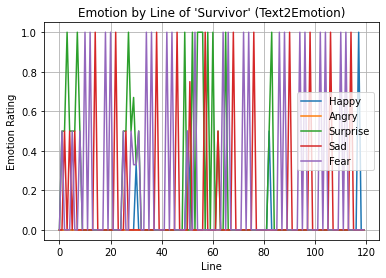

Emotion by Line of The Show Must Go On:


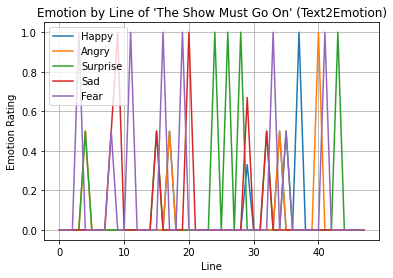

Emotion by Line of This Is Me:


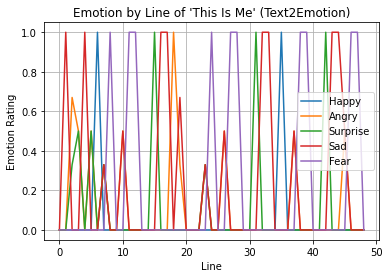

Emotion by Line of What A Wonderful World:


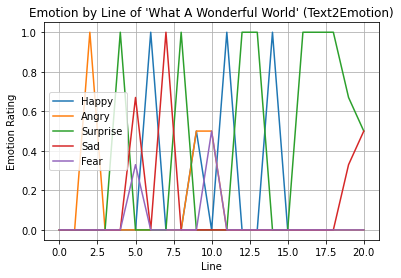

In [5]:
lyrics = os.listdir('lyrics/')
x = 0

for l in lyrics :
    filename = "lyrics/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = generic_text2emotion(filename, title)

In [9]:
def emo_through(filename, title) :

    lines = 0
    
    file1 = open(filename, 'r')
    
    for line in file1:
        b = line.strip()
        if b != "" :
            lines += 1
    
    file1.close()
    
    file1 = open(filename, 'r')
    
    emotion = np.zeros((5, lines + 1), dtype=float) # a 5x15 array (5 emotions, 0:14 lines)

    lines = 0
    vec = [0,0,0,0,0]; 

    for line in file1:
        b = line.strip()
        score = te.get_emotion(b)
    
        if b != '' :
            lines += 1
        
            # add polarity scores of all lines to evaluate poem as a whole later
            vec = [vec[0] + score['Happy'], vec[1] + score['Angry'], vec[2] + score['Surprise'], vec[3] + score['Sad'], vec[4] + score['Fear']]
    
            # evaluate poem using equation similar to net sentiment rate
            for i in range(5) :
                    emotion[i, lines] = vec[i] / lines
    
    # Closing file(s)
    file1.close()
    
    plt.plot(emotion[0], label = 'Happy')
    plt.plot(emotion[1], label = 'Angry')
    plt.plot(emotion[2], label = 'Surprise')
    plt.plot(emotion[3], label = 'Sad')
    plt.plot(emotion[4], label = 'Fear')
    plt.title('Emotion Levels Through ' + title + ' (Text2Emotion)')
    plt.xlabel('Line')
    plt.ylabel('Sum Emotion Rating (%/100)')
    plt.legend()
    plt.grid(True)
    plt.show()

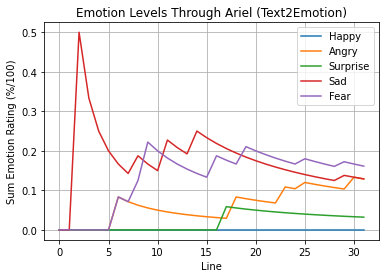

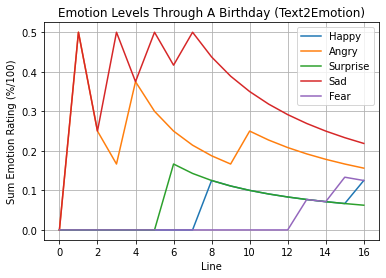

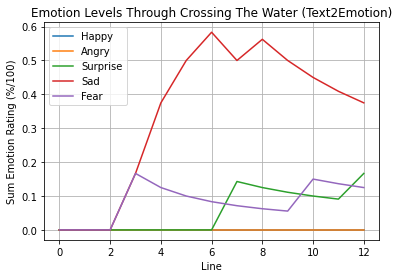

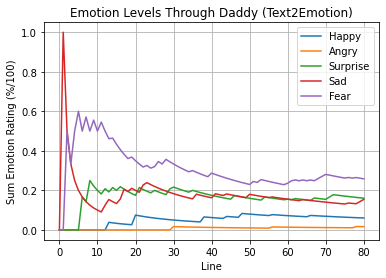

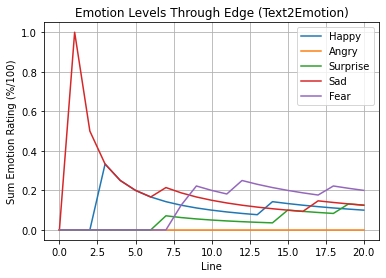

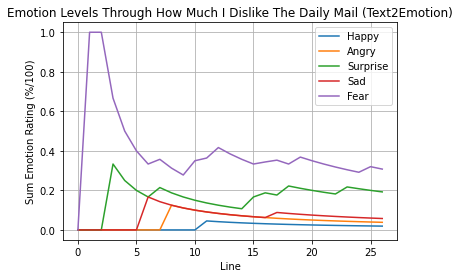

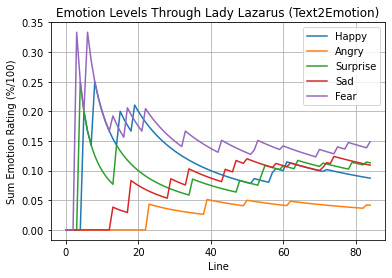

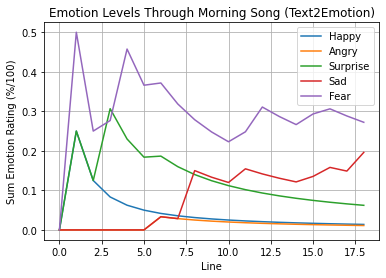

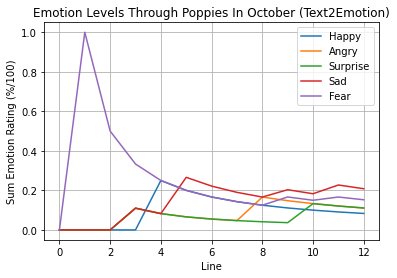

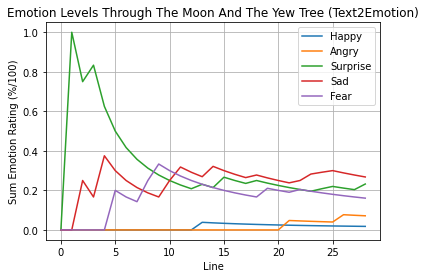

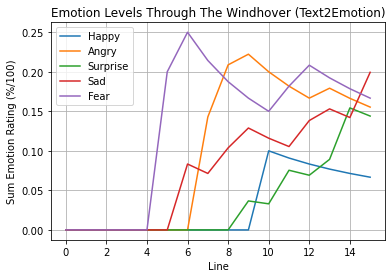

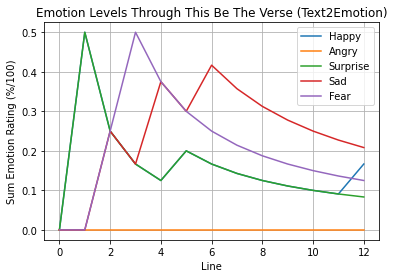

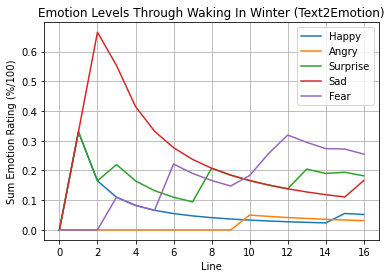

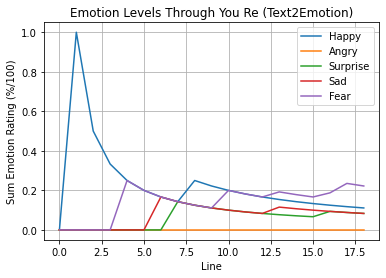

In [10]:
poetry = os.listdir('poetry/')
x = 0

for l in poetry :
    filename = "poetry/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = emo_through(filename, title)

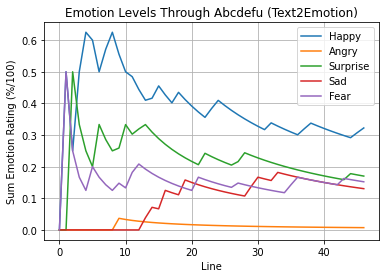

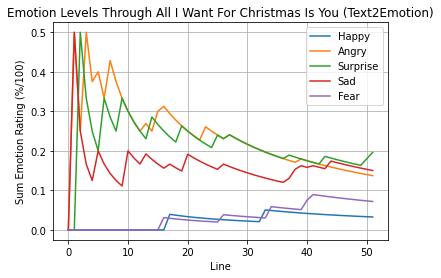

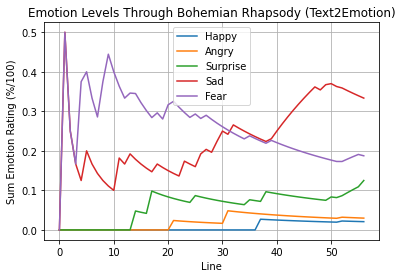

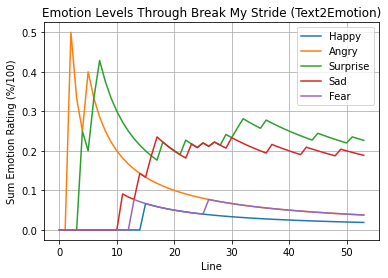

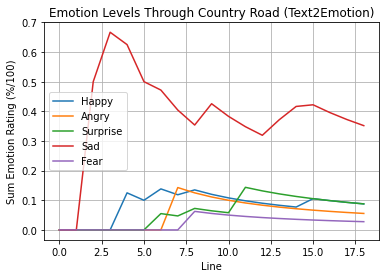

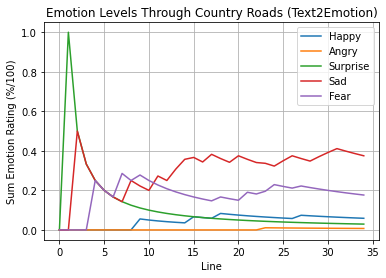

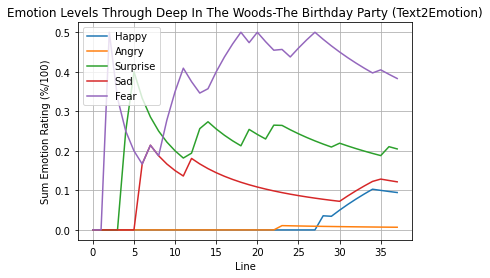

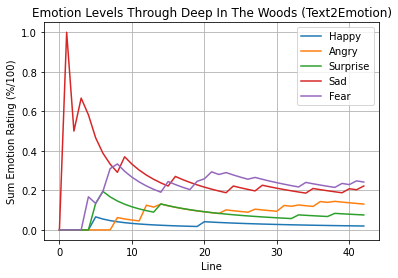

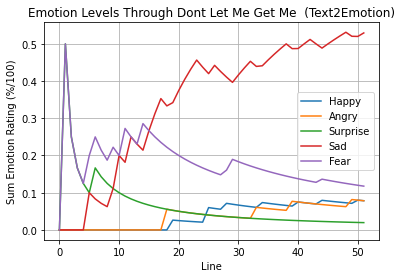

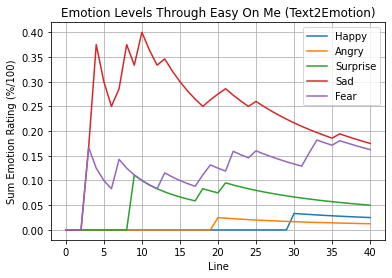

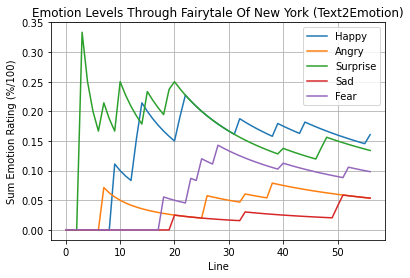

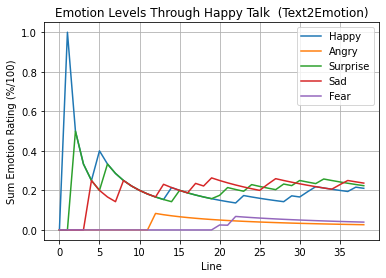

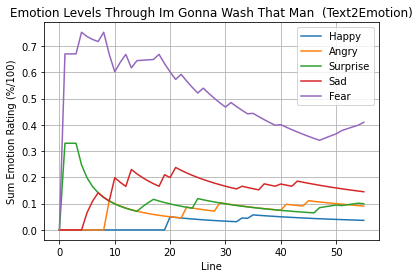

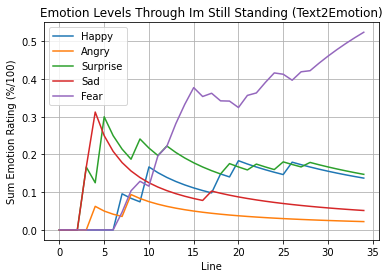

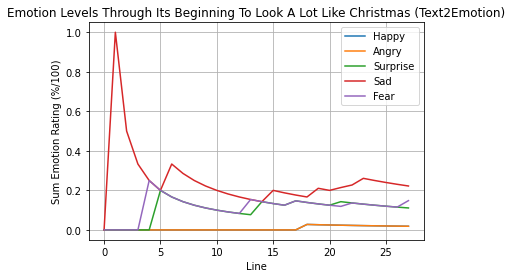

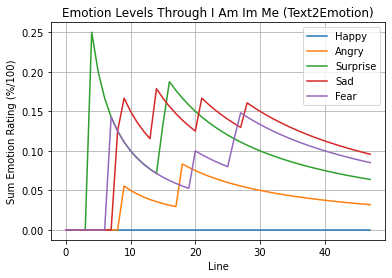

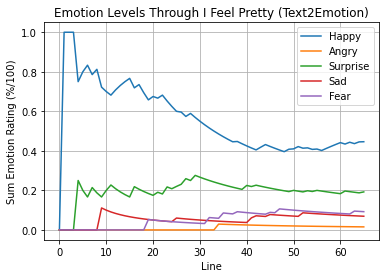

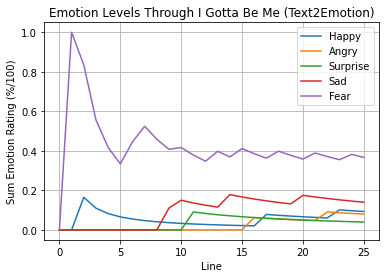

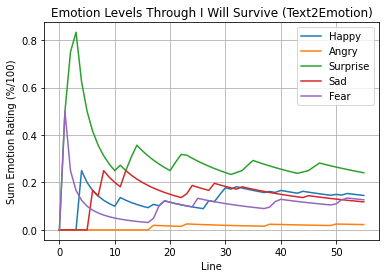

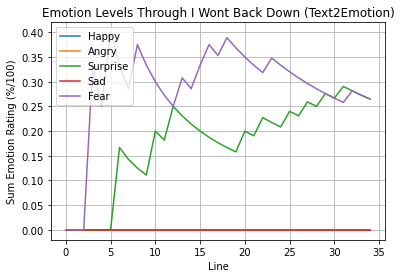

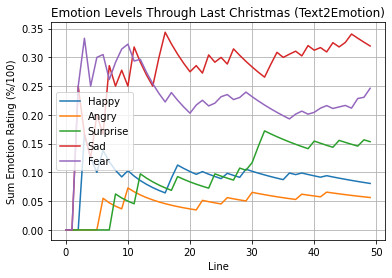

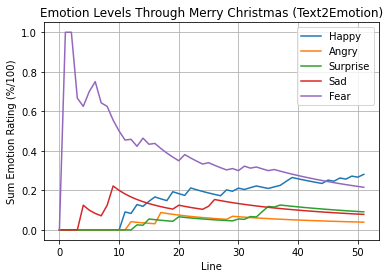

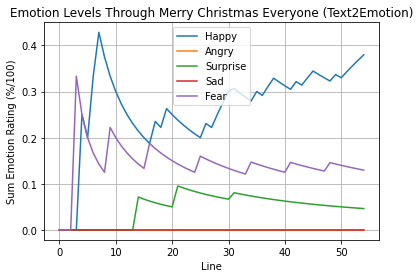

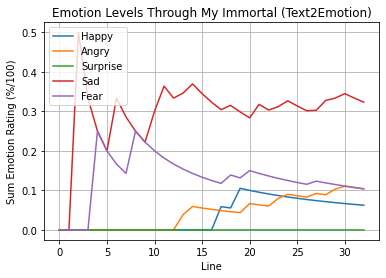

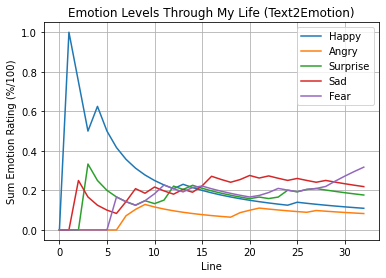

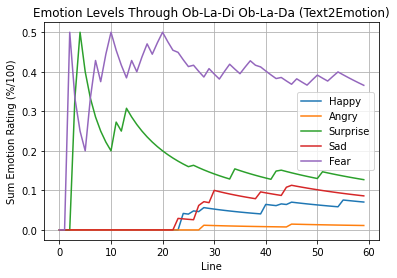

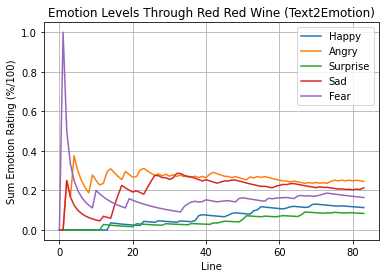

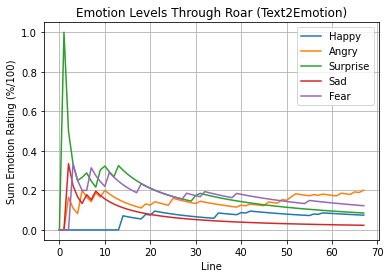

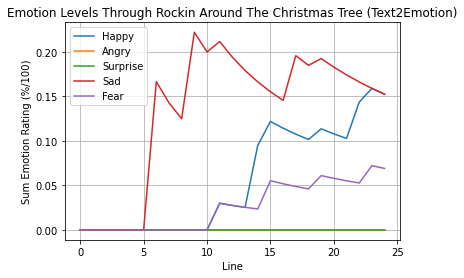

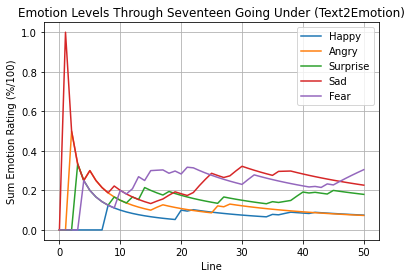

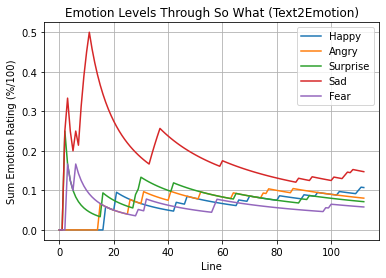

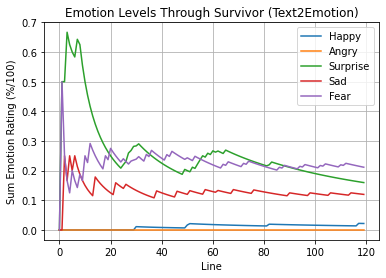

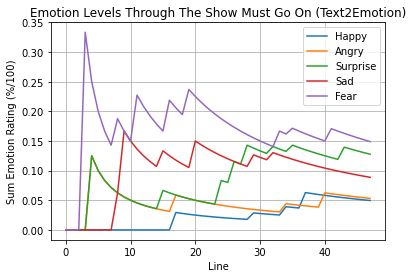

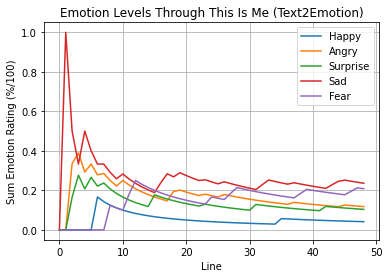

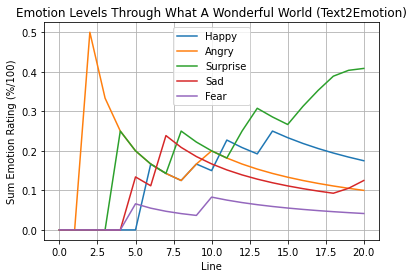

In [12]:
lyrics = os.listdir('lyrics/')
x = 0

for l in lyrics :
    filename = "lyrics/" + l
    l = l.replace(".txt", "")
    l = l.replace("_", " ")
    title = l.title()
    x = emo_through(filename, title)